<a href="https://colab.research.google.com/github/coen2812023/Classification/blob/main/KNN_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier




In [ ]:

# Create a list of data with 4 features and one target variable
data = [['Low', 'Small', 'Urban', 'No', 'No'],
        ['Low', 'Small', 'Urban', 'Yes', 'No'],
        ['Low', 'Large', 'Urban', 'No', 'Yes'],
        ['Low', 'Large', 'Urban', 'Yes', 'Yes'],
        ['Medium', 'Small', 'Urban', 'No', 'No'],
        ['Medium', 'Small', 'Rural', 'No', 'Yes'],
        ['Medium', 'Large', 'Rural', 'No', 'Yes'],
        ['Medium', 'Large', 'Rural', 'Yes', 'No'],
        ['High', 'Small', 'Rural', 'No', 'Yes'],
        ['High', 'Small', 'Rural', 'Yes', 'Yes'],
        ['High', 'Large', 'Urban', 'No', 'Yes'],
        ['Medium', 'Small', 'Rural', 'No', 'Yes'],
         ['High', 'Small', 'Rural', 'No', 'Yes'],
        ['High', 'Large', 'Urban', 'Yes', 'No']]

# Create a dataframe from the data
df = pd.DataFrame(data, columns = ['Income', 'House Size', 'Location', 'Loan', 'Buy'])

# Print the dataframe
print(df)

In [ ]:


# Split the dataset into features and target variable
X = df.iloc[:, :-1] # select all rows and all columns except the last one
X = pd.get_dummies(X, drop_first=True)
y = df.iloc[:, -1] # select all rows and only the last column


In [ ]:
X.head()

,Income_Low,Income_Medium,House Size_Small,Location_Urban,Loan_Yes
0,1,0,1,1,0
1,1,0,1,1,1
2,1,0,0,1,0
3,1,0,0,1,1
4,0,1,1,1,0


In [ ]:
y

0      No
1      No
2     Yes
3     Yes
4      No
5     Yes
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Buy, dtype: object

In [ ]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# Create the classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict labels for test data
predictions = knn.predict(X_test)

# Evaluate the classifier using accuracy
acc = accuracy_score(y_test,predictions)
print("Accuracy:", acc)



Accuracy: 0.8


In [ ]:
pd.DataFrame(predictions, y_test)

,0
Buy,
Yes,Yes
No,No
No,Yes
Yes,Yes
Yes,Yes


In [ ]:

# Define the decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model using accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)


Accuracy: 0.6
Confusion Matrix:
[[1 1]
 [1 2]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


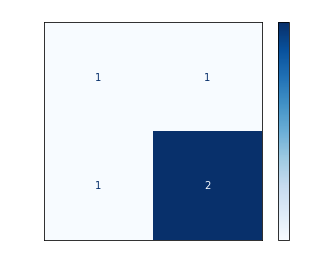

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

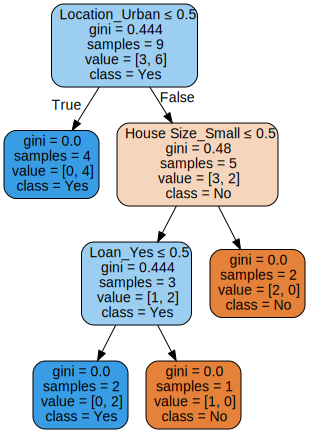

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Visualize the decision tree
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph


In [1]:
import pandas as pd

data = {
    'customer_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'age': [30, 40, 25, 35, 45, 55, 60, 20, 50, 33],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'tenure': [12, 24, 36, 48, 60, 72, 84, 96, 108, 120],
    'balance': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000],
    'products': [2, 3, 1, 4, 2, 3, 4, 5, 1, 2],
    'credit_score': [700, 650, 600, 550, 500, 450, 400, 350, 300, 250],
    'active_member': [1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
    'estimated_salary': [50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000],
    'location': ['USA', 'Canada', 'Mexico', 'USA', 'Canada', 'Mexico', 'USA', 'Canada', 'Mexico', 'USA'],
    'phone': ['Android', 'iOS', 'Windows', 'Android', 'iOS', 'Windows', 'Android', 'iOS', 'Windows', 'Android'],
    'loan': [0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
    'security_deposit': [0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
    'cd_account': [0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
    'online_banking': [0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
    'churned': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

In [2]:
df.head()

,customer_id,age,gender,tenure,balance,products,credit_score,active_member,estimated_salary,location,phone,loan,security_deposit,cd_account,online_banking,churned
0,1,30,Male,12,1000,2,700,1,50000,USA,Android,0,0,0,0,0
1,2,40,Female,24,2000,3,650,0,55000,Canada,iOS,1,1,1,1,1
2,3,25,Male,36,3000,1,600,1,60000,Mexico,Windows,1,1,1,1,0
3,4,35,Female,48,4000,4,550,1,65000,USA,Android,0,0,0,0,1
4,5,45,Male,60,5000,2,500,0,70000,Canada,iOS,0,0,0,0,0


In [13]:

# Split the dataset into features and target variable
X = df. iloc[:,1:] # select all rows and all columns except the first one
X = X.iloc[:, :-1] # select all rows and all columns except the last one
X = pd.get_dummies(X, drop_first=True)
y = df.iloc[:, -1] # select all rows and only the last column

In [14]:
X

,age,tenure,balance,products,credit_score,active_member,estimated_salary,loan,security_deposit,cd_account,online_banking,gender_Male,location_Mexico,location_USA,phone_Windows,phone_iOS
0,30,12,1000,2,700,1,50000,0,0,0,0,1,0,1,0,0
1,40,24,2000,3,650,0,55000,1,1,1,1,0,0,0,0,1
2,25,36,3000,1,600,1,60000,1,1,1,1,1,1,0,1,0
3,35,48,4000,4,550,1,65000,0,0,0,0,0,0,1,0,0
4,45,60,5000,2,500,0,70000,0,0,0,0,1,0,0,0,1
5,55,72,6000,3,450,1,75000,1,1,1,1,1,1,0,1,0
6,60,84,7000,4,400,0,80000,1,1,1,1,0,0,1,0,0
7,20,96,8000,5,350,1,85000,0,0,0,0,1,0,0,0,1
8,50,108,9000,1,300,0,90000,0,0,0,0,0,1,0,1,0
9,33,120,10000,2,250,1,95000,1,1,1,1,1,0,1,0,0


In [17]:
# Define the decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X, y)


DecisionTreeClassifier()

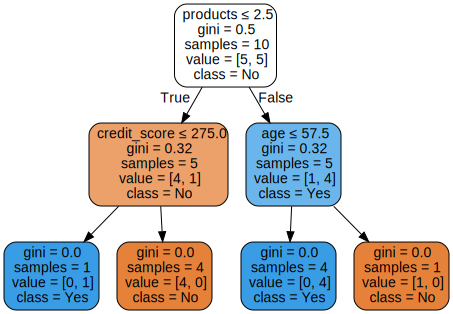

In [18]:
from sklearn.tree import export_graphviz
import graphviz

# Visualize the decision tree
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph